# Correlation Matrix Analyses

## By Question

Summary Statistics of Correlation Matrix:
          LSAS_1     LSAS_2     LSAS_3     LSAS_4     LSAS_5     LSAS_6  \
count  56.000000  56.000000  56.000000  56.000000  56.000000  56.000000   
mean    0.357479   0.405061   0.328129   0.321553   0.379966   0.316487   
std     0.150090   0.157733   0.153246   0.148791   0.152543   0.180287   
min     0.098162   0.136939   0.065226   0.078582   0.129102   0.030633   
25%     0.263618   0.295493   0.234785   0.221396   0.285217   0.202493   
50%     0.330419   0.355353   0.277910   0.279482   0.326238   0.252182   
75%     0.469064   0.531381   0.422937   0.407866   0.491416   0.450661   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

          LSAS_7     LSAS_8     LSAS_9    LSAS_10  ...  BDI_Loss_Of_Interest  \
count  56.000000  56.000000  56.000000  56.000000  ...             56.000000   
mean    0.390146   0.384008   0.358999   0.382126  ...              0.378239   
std     0.153405   0.164430   0.161430   0

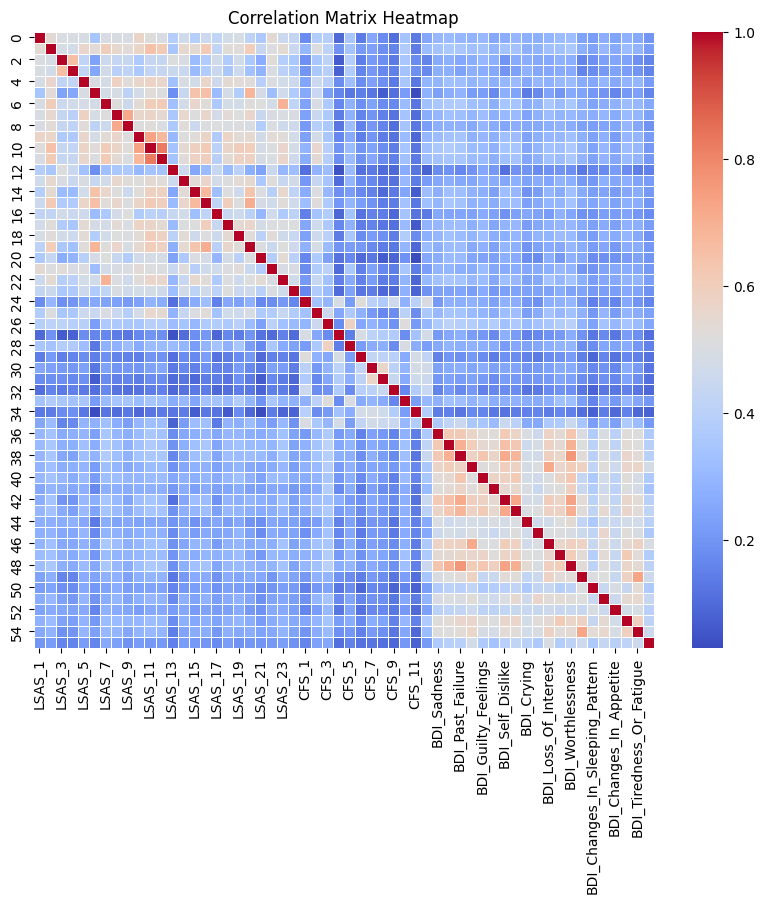

Explained Variance by each component:
[0.41453886 0.26457141]


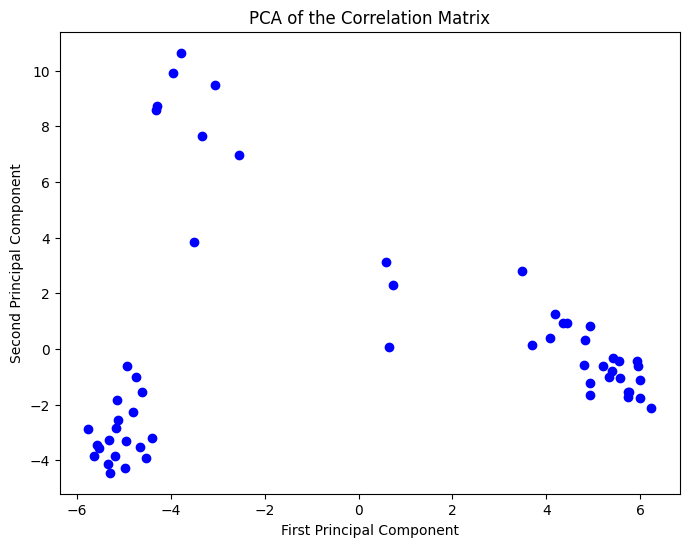

C:\Users\MadiL\AppData\Local\Temp\ipykernel_26604\114157158.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df['PC1'], y=loadings_df.index, palette='coolwarm')


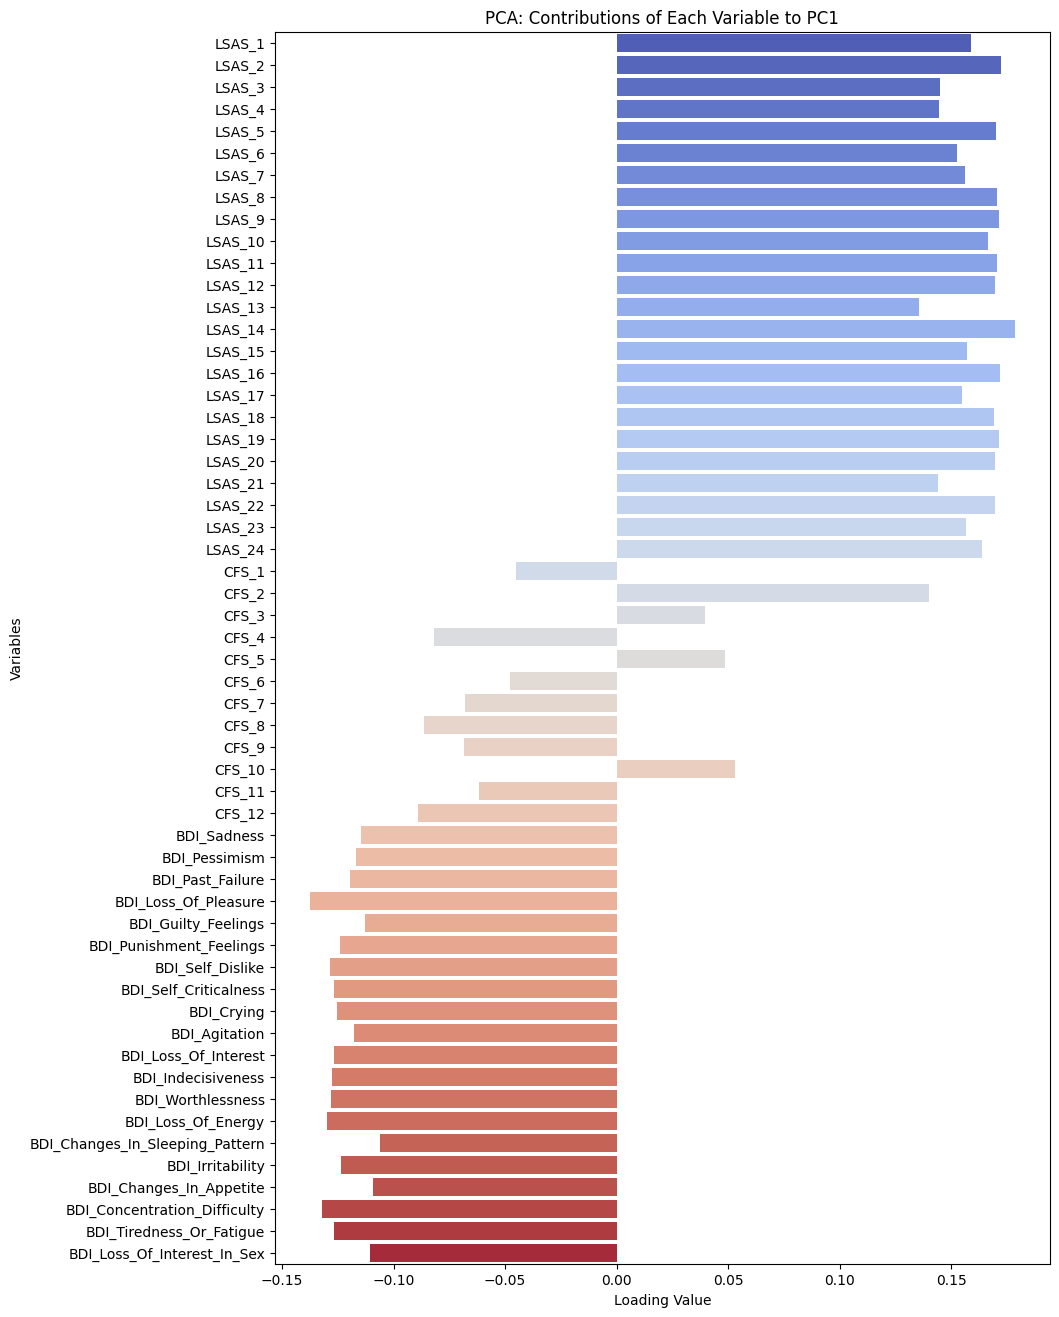

C:\Users\MadiL\AppData\Local\Temp\ipykernel_26604\114157158.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df['PC2'], y=loadings_df.index, palette='coolwarm')


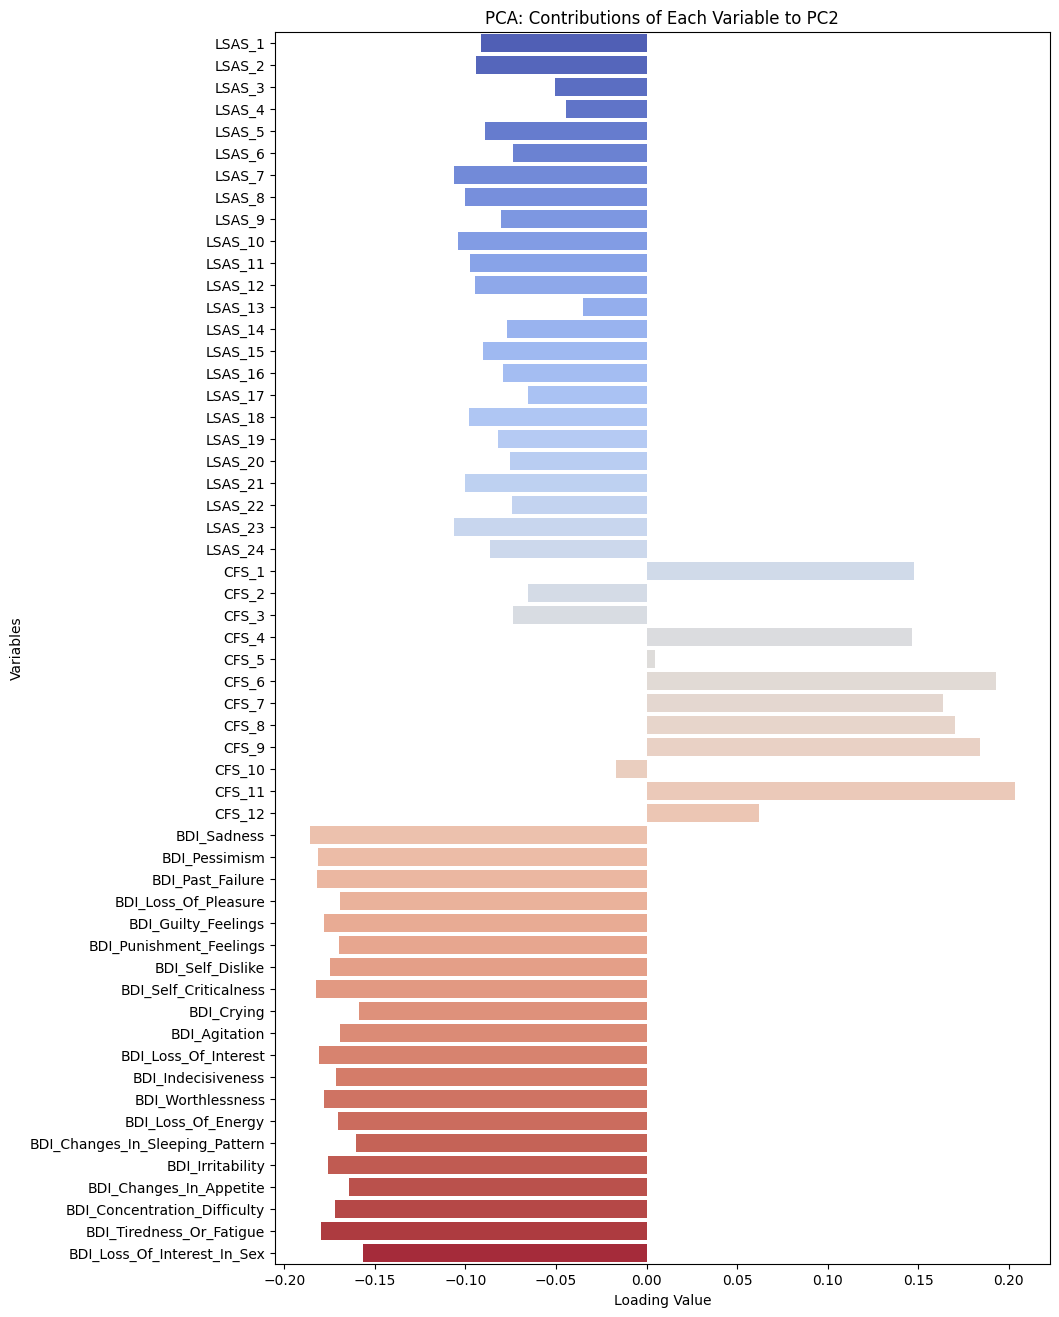

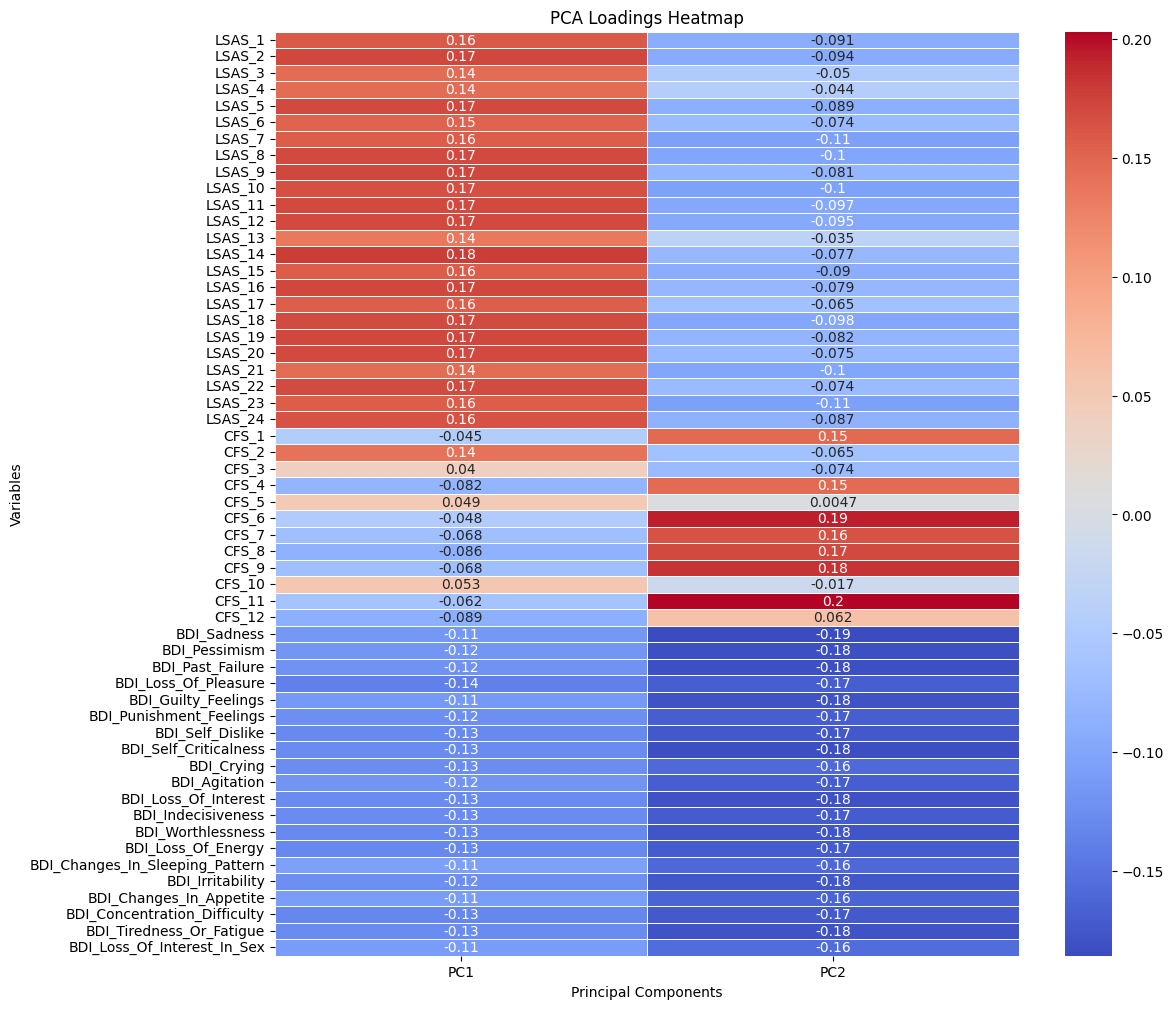

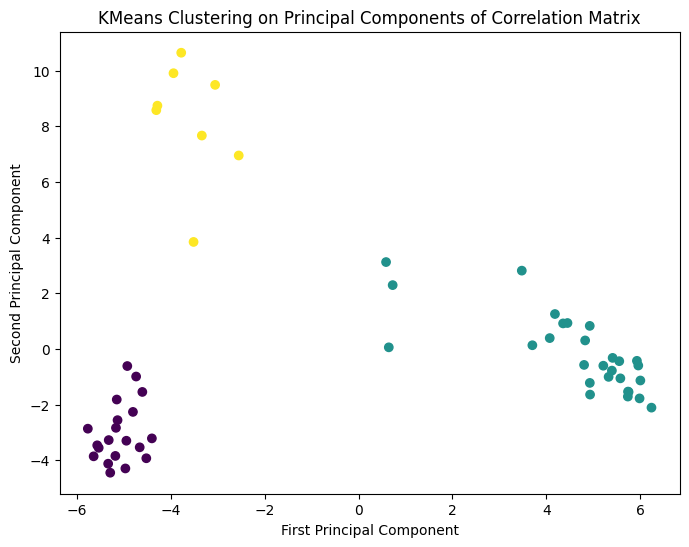

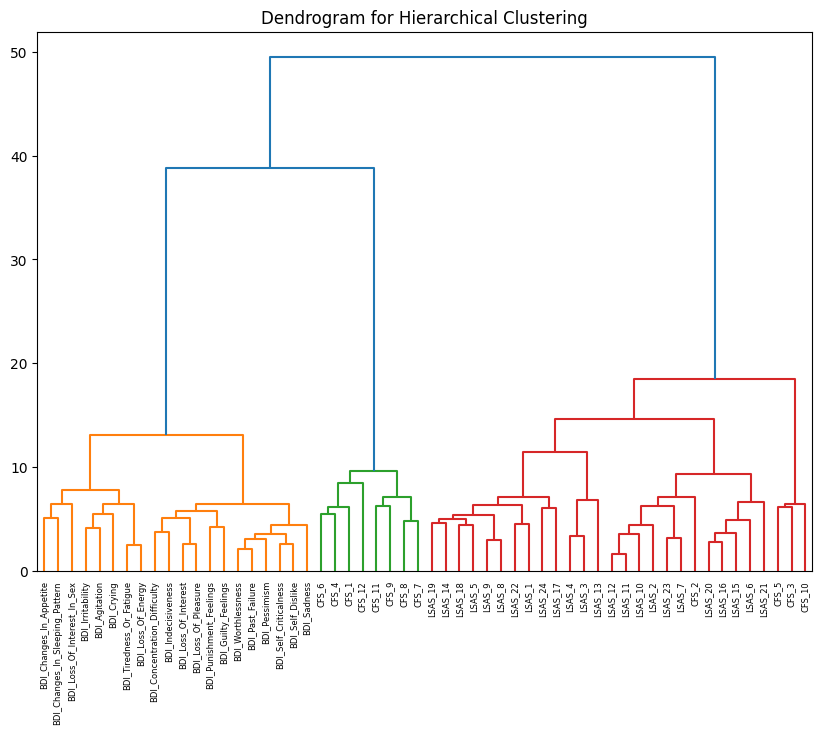

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = r'C:\Users\MadiL\Thesis CodeBase\Cross-Sectional\Matricies\Questions_Corr.csv'
correlation_matrix = pd.read_csv(file_path)


# 1. Summary Statistics
print("Summary Statistics of Correlation Matrix:")
print(correlation_matrix.describe())

# 2. Heatmap of the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# 3. Principal Component Analysis (PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(correlation_matrix.fillna(0))  # Handle NaNs

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

print("Explained Variance by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of the Correlation Matrix')
plt.show()

# --- PCA Loadings Visualization ---
# Get PCA components (loadings) - these show how each original variable contributes to each PC
loadings = pca.components_

# Create a DataFrame to view the loadings for each original variable (question)
loadings_df = pd.DataFrame(loadings.T, columns=[f"PC{i+1}" for i in range(loadings.shape[0])], 
                            index=correlation_matrix.columns)

# Visualize the loadings for the first principal component (PC1)
plt.figure(figsize=(10, 16))
sns.barplot(x=loadings_df['PC1'], y=loadings_df.index, palette='coolwarm')
plt.title('PCA: Contributions of Each Variable to PC1')
plt.xlabel('Loading Value')
plt.ylabel('Variables')
plt.show()

# Visualize the loadings for the second principal component (PC2)
plt.figure(figsize=(10, 16))
sns.barplot(x=loadings_df['PC2'], y=loadings_df.index, palette='coolwarm')
plt.title('PCA: Contributions of Each Variable to PC2')
plt.xlabel('Loading Value')
plt.ylabel('Variables')
plt.show()

# Visualize the loadings for all components in a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Variables')
plt.show()


# 4. KMeans Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering on Principal Components of Correlation Matrix')
plt.show()

# 5. Hierarchical Clustering (Dendrogram)
linked = linkage(scaled_data, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=list(correlation_matrix.columns), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

